In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Import dataset and data cleaning

In [2]:
# read your 1+ StreamingHistory files (depending on how extensive your streaming history is) into pandas dataframes
df_stream0 = pd.read_json('/Users/jaimesastrecrespo/DAFT_1022/Final_project/Data_from_spotify/StreamingHistory0.json')
df_stream1 = pd.read_json('/Users/jaimesastrecrespo/DAFT_1022/Final_project/Data_from_spotify/StreamingHistory1.json')
df_stream2 = pd.read_json('/Users/jaimesastrecrespo/DAFT_1022/Final_project/Data_from_spotify/StreamingHistory2.json')

# merge streaming dataframes
df_stream = pd.concat([df_stream0, df_stream1, df_stream2])

# create a 'UniqueID' for each song by combining the fields 'artistName' and 'trackName'
df_stream['UniqueID'] = df_stream['artistName'] + ":" + df_stream['trackName']

df_stream.head()

,endTime,artistName,trackName,msPlayed,UniqueID
0,2021-12-03 19:43,Siloé,La Verdad,156897,Siloé:La Verdad
1,2021-12-04 07:51,Txarango,Compta amb mi,131140,Txarango:Compta amb mi
2,2021-12-04 07:55,Txarango,Tant de bo,193278,Txarango:Tant de bo
3,2021-12-04 07:56,Oques Grasses,Inevitable,600,Oques Grasses:Inevitable
4,2021-12-04 07:56,Els Pets,No vull que t'agradi aquesta cançó,80,Els Pets:No vull que t'agradi aquesta cançó


In [3]:
df_stream["endTime"]=pd.to_datetime(df_stream["endTime"], utc=True )
df_stream['hour']=df_stream["endTime"].dt.time
df_stream['day']=df_stream["endTime"].dt.day
df_stream['weekday']=df_stream["endTime"].dt.day_name()
df_stream['month']=df_stream["endTime"].dt.month
df_stream['year']=df_stream["endTime"].dt.year
df_stream['date']=df_stream["endTime"].dt.date

In [4]:
del df_stream['endTime']
# New column in seconds, drop miliseconds
df_stream['duration_ms'] = round(df_stream['msPlayed']/1000,0)
df_stream.drop("msPlayed",axis=1, inplace=True)

In [5]:
df_stream

,artistName,trackName,UniqueID,hour,day,weekday,month,year,date,duration_ms
0,Siloé,La Verdad,Siloé:La Verdad,19:43:00,3,Friday,12,2021,2021-12-03,157.0
1,Txarango,Compta amb mi,Txarango:Compta amb mi,07:51:00,4,Saturday,12,2021,2021-12-04,131.0
2,Txarango,Tant de bo,Txarango:Tant de bo,07:55:00,4,Saturday,12,2021,2021-12-04,193.0
3,Oques Grasses,Inevitable,Oques Grasses:Inevitable,07:56:00,4,Saturday,12,2021,2021-12-04,1.0
4,Els Pets,No vull que t'agradi aquesta cançó,Els Pets:No vull que t'agradi aquesta cançó,07:56:00,4,Saturday,12,2021,2021-12-04,0.0
...,...,...,...,...,...,...,...,...,...,...
3485,Tonic,Open Up Your Eyes,Tonic:Open Up Your Eyes,14:10:00,4,Sunday,12,2022,2022-12-04,220.0
3486,BROCKHAMPTON,OLD NEWS (feat. Baird),BROCKHAMPTON:OLD NEWS (feat. Baird),14:14:00,4,Sunday,12,2022,2022-12-04,194.0
3487,Smino,VERIZON,Smino:VERIZON,14:17:00,4,Sunday,12,2022,2022-12-04,208.0
3488,blink-182,What's My Age Again?,blink-182:What's My Age Again?,14:19:00,4,Sunday,12,2022,2022-12-04,148.0


In [6]:
#df_stream.to_csv("my_year_stream.csv")

In [7]:
import json

In [8]:
with open("/Users/jaimesastrecrespo/DAFT_1022/Final_project/Data_from_spotify/YourLibrary.json","r") as fp:
    #r - open file in read mode
    data = json.load(fp)
data = data['tracks']
# read your edited Library into a pandas dataframe
df_library = pd.DataFrame.from_dict(data)


In [9]:
df_library.head()

,artist,album,track,uri
0,Luisaker,Nítido,Nítido,spotify:track:5gEcJjcrveT2gRuyPyPeDt
1,Iseo & Dodosound,Roots in the Air,Roots in the Air,spotify:track:3ypOHGkuksfe3hZ1C1BgC0
2,AG Club,Fuck Your Expectations PT. 2,"Memphis, Pt. 2 (feat. NLE Choppa and A$AP Ferg)",spotify:track:3z1z5Hnt9IgHjl4KsHFmem
3,SZA,I Hate U,I Hate U,spotify:track:5dXWFMwD7I7zXsInONVl0H
4,El Último Ke Zierre,Vivos... Por Domesticar!,Tus Bragas,spotify:track:1CuGw5qa90jzxVleUHZGbw


In [10]:
df_library.shape

(1798, 4)

In [11]:
# add UniqueID column (same as above)
df_library['UniqueID'] = df_library['artist'] + ":" + df_library['track']

# add column with track URI stripped of 'spotify:track:'
new = df_library["uri"].str.split(":", expand = True)
df_library['track_uri'] = new[2]

df_library.head()

,artist,album,track,uri,UniqueID,track_uri
0,Luisaker,Nítido,Nítido,spotify:track:5gEcJjcrveT2gRuyPyPeDt,Luisaker:Nítido,5gEcJjcrveT2gRuyPyPeDt
1,Iseo & Dodosound,Roots in the Air,Roots in the Air,spotify:track:3ypOHGkuksfe3hZ1C1BgC0,Iseo & Dodosound:Roots in the Air,3ypOHGkuksfe3hZ1C1BgC0
2,AG Club,Fuck Your Expectations PT. 2,"Memphis, Pt. 2 (feat. NLE Choppa and A$AP Ferg)",spotify:track:3z1z5Hnt9IgHjl4KsHFmem,"AG Club:Memphis, Pt. 2 (feat. NLE Choppa and A...",3z1z5Hnt9IgHjl4KsHFmem
3,SZA,I Hate U,I Hate U,spotify:track:5dXWFMwD7I7zXsInONVl0H,SZA:I Hate U,5dXWFMwD7I7zXsInONVl0H
4,El Último Ke Zierre,Vivos... Por Domesticar!,Tus Bragas,spotify:track:1CuGw5qa90jzxVleUHZGbw,El Último Ke Zierre:Tus Bragas,1CuGw5qa90jzxVleUHZGbw


In [12]:
#df_library.to_csv("my_current_library.csv")

In [13]:
# create final dict as a copy df_stream
df_final = df_stream.copy()

In [14]:
# add column checking if streamed song is in library
# not used in this project but could be helpful for cool visualizations
df_final['In Library'] = np.where(df_final['UniqueID'].isin(df_library['UniqueID'].tolist()),1,0)

# left join with df_library on UniqueID to bring in album and track_uri
df_final = pd.merge(df_final, df_library[['album','UniqueID']],how='left',on=['UniqueID'])

df_final.head()

,artistName,trackName,UniqueID,hour,day,weekday,month,year,date,duration_ms,In Library,album
0,Siloé,La Verdad,Siloé:La Verdad,19:43:00,3,Friday,12,2021,2021-12-03,157.0,1,La Verdad
1,Txarango,Compta amb mi,Txarango:Compta amb mi,07:51:00,4,Saturday,12,2021,2021-12-04,131.0,1,Som Riu
2,Txarango,Tant de bo,Txarango:Tant de bo,07:55:00,4,Saturday,12,2021,2021-12-04,193.0,1,Som Riu
3,Oques Grasses,Inevitable,Oques Grasses:Inevitable,07:56:00,4,Saturday,12,2021,2021-12-04,1.0,0,NaN
4,Els Pets,No vull que t'agradi aquesta cançó,Els Pets:No vull que t'agradi aquesta cançó,07:56:00,4,Saturday,12,2021,2021-12-04,0.0,0,NaN


In [15]:
df_final.dtypes

artistName      object
trackName       object
UniqueID        object
hour            object
day              int64
weekday         object
month            int64
year             int64
date            object
duration_ms    float64
In Library       int64
album           object
dtype: object

In [16]:
#df_final.to_csv("my_streaming_lib_together.csv")

# EDA

In [17]:
corr = df_final.corr()
# Set up the figure size
plt.figure(figsize=(150, 100))
# Draw the heatmap with the annotations and the right color
sns.heatmap(corr, annot=True, cmap= 'coolwarm')

<AxesSubplot:>

In [18]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = df_final.groupby(by='artistName')['duration_ms'].sum().sort_values(ascending=False)[:15]

amount_of_time

artistName
FERNANDOCOSTA              101976.0
Current Swell               96566.0
Foo Fighters                95348.0
AG Club                     92604.0
Violadores Del Verso        86823.0
Bejo                        84320.0
Smino                       70420.0
Bizarrap                    69743.0
Eminem                      63101.0
Residente                   60516.0
Quevedo                     60328.0
Arctic Monkeys              57791.0
Sum 41                      54759.0
Macklemore & Ryan Lewis     54305.0
C. Tangana                  45626.0
Name: duration_ms, dtype: float64

In [19]:
colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

layout = go.Layout(
    title='Popularity of artists by amount of time spent listening to their song',
    yaxis= dict(
        title='Amount of time (in minutes)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis= dict(
        title = 'Artist Name'))


fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                            marker_color=colors)])

fig.show()

In [20]:
df_final.corr()

,day,month,year,duration_ms,In Library
day,1.000000,-0.004665,-0.117916,0.052748,0.020127
month,-0.004665,1.000000,-0.453305,-0.006918,-0.024948
year,-0.117916,-0.453305,1.000000,-0.065039,-0.033661
duration_ms,0.052748,-0.006918,-0.065039,1.000000,0.065975
In Library,0.020127,-0.024948,-0.033661,0.065975,1.000000


In [21]:
df_final.describe()

,day,month,year,duration_ms,In Library
count,24447.000000,24447.000000,24447.000000,24447.000000,24447.000000
mean,14.944492,6.848652,2021.926208,144.133186,0.804720
std,8.500573,3.207680,0.261438,112.461541,0.396424
min,1.000000,1.000000,2021.000000,0.000000,0.000000
25%,8.000000,5.000000,2022.000000,13.000000,1.000000
50%,15.000000,7.000000,2022.000000,164.000000,1.000000
75%,22.000000,9.000000,2022.000000,214.000000,1.000000
max,31.000000,12.000000,2022.000000,2144.000000,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

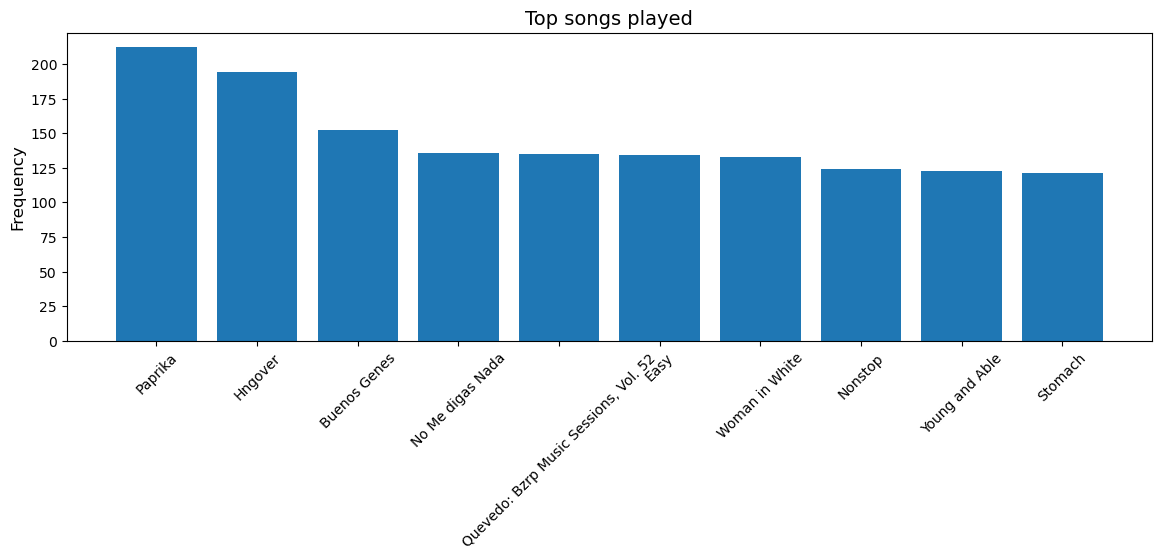

In [22]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar((df_final['trackName']).value_counts().index[:10],
        (df_final['trackName']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top songs played", size = 14)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

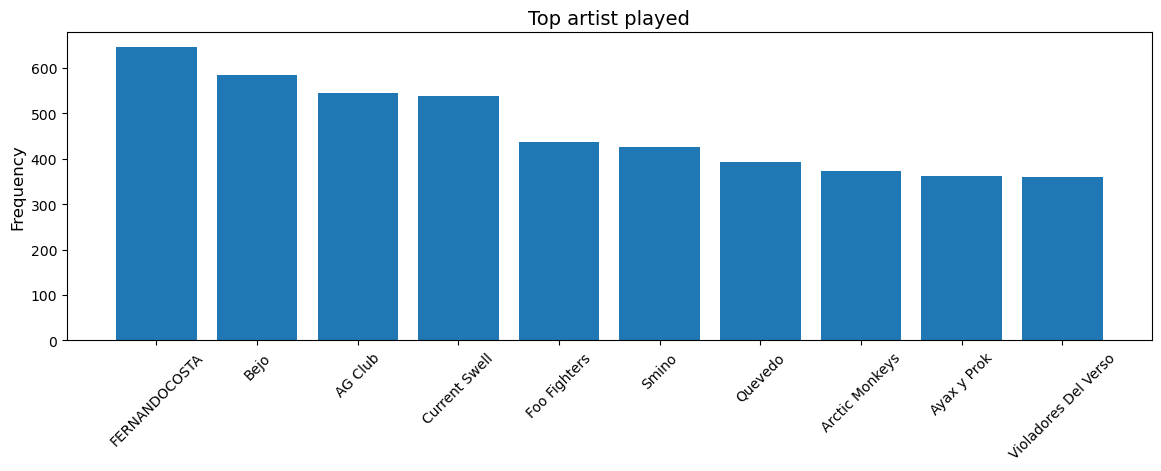

In [23]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar((df_final['artistName']).value_counts().index[:10],
        (df_final['artistName']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top artist played", size = 14)
plt.xticks(rotation=45)